In [67]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [70]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [84]:
df.describe(include='all', percentiles = [0.1,0.2,0.3,0.5])

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,22628.000000,22628.000000,22628.000000,19662,22628,22628.000000,22628.000000,22628.000000,22628,22628,22628
unique,NaN,NaN,NaN,13983,22621,NaN,NaN,NaN,3,6,20
top,NaN,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,NaN,136,3,NaN,NaN,NaN,13365,10048,6145
mean,11737.272097,919.695908,43.282880,NaN,NaN,4.183092,0.818764,2.631784,NaN,NaN,NaN
std,6781.574232,201.683804,12.328176,NaN,NaN,1.115911,0.385222,5.787520,NaN,NaN,NaN
min,0.000000,1.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
10%,2341.700000,820.000000,28.000000,NaN,NaN,2.000000,0.000000,0.000000,NaN,NaN,NaN
20%,4694.400000,840.000000,33.000000,NaN,NaN,3.000000,1.000000,0.000000,NaN,NaN,NaN
30%,7030.100000,863.000000,36.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN


In [9]:
df.drop(df.columns[0],inplace=True, axis=1)

In [10]:
df.shape

(23486, 10)

In [75]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [76]:
# Removing rows with NaN for below colnames
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

In [54]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0


In [88]:
(df['Division Name'].value_counts()/len(df))*100

General           59.063992
General Petite    34.634082
Initmates          6.301927
Name: Division Name, dtype: float64

In [14]:
len(df['Class Name'].unique())

20

In [15]:
df['Title'].isnull().sum()

2966

In [16]:
# Extracting Unique Count by Column
uni_count = []
for x in df.columns:
    uni_count.append([x,len(df[x].unique())])

In [17]:
uni_count

[['Clothing ID', 1172],
 ['Age', 77],
 ['Title', 13984],
 ['Review Text', 22621],
 ['Rating', 5],
 ['Recommended IND', 2],
 ['Positive Feedback Count', 82],
 ['Division Name', 3],
 ['Department Name', 6],
 ['Class Name', 20]]

In [18]:
df['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [95]:
#Class: Bad when Rating <=3, Class: Good otherwise
df["class"] = 1
df.loc[df.Rating <= 3,["class"]] = 0

In [20]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,class
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784,0.770506
std,201.683804,12.328176,1.115911,0.385222,5.787520,0.420517
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000


In [21]:
df['class'].value_counts()  #distribution

1    17435
0     5193
Name: class, dtype: int64

In [90]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Text(0.5, 1.0, 'Count per class')

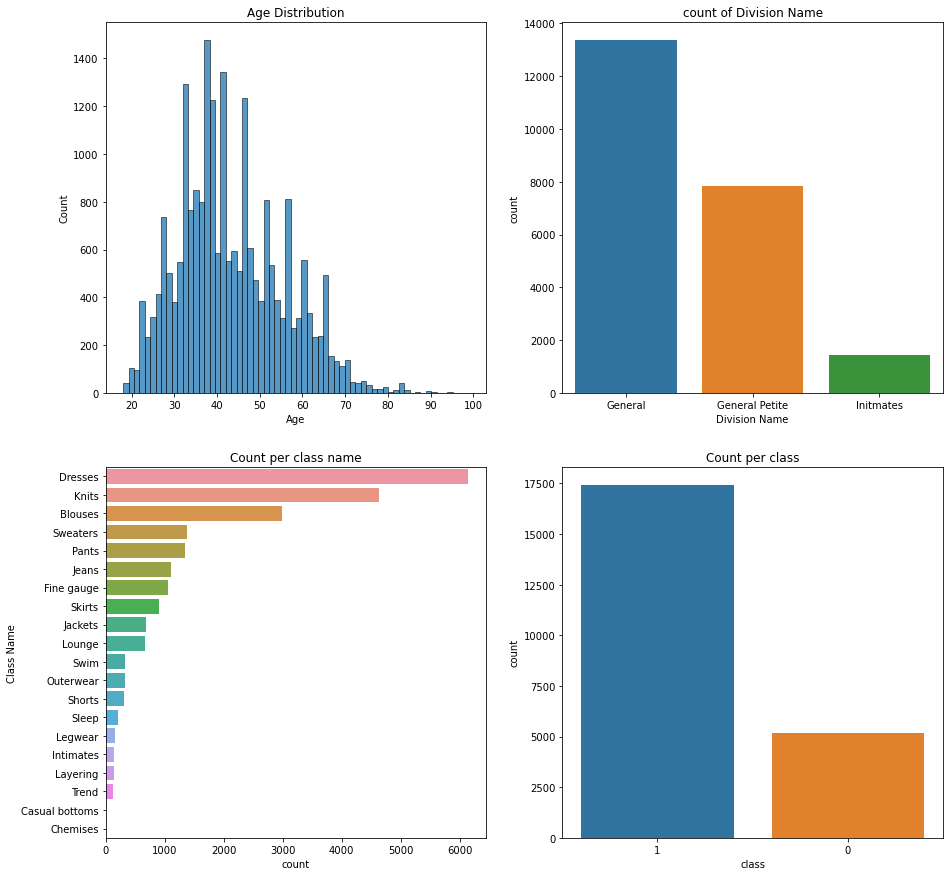

In [101]:
# Continous Distributions
fig, axes = plt.subplots(2,2,figsize=(15,15))
sns.histplot(df.Age, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")

sns.countplot(x="Division Name",data= df, order = df["Division Name"].value_counts().index, ax=axes[0,1])
axes[0,1].set_title("count of Division Name")

sns.countplot(y="Class Name", data= df, order= df["Class Name"].value_counts().index, ax=axes[1,0])
axes[1,0].set_title("Count per class name")

sns.countplot(x= "class", data=df, order=df["class"].value_counts().index, ax=axes[1,1])
axes[1,1].set_title("Count per class")

In [94]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [23]:
messages = df.copy()

In [24]:
#to arrange the droped index
messages.reset_index(inplace=True)

In [25]:
messages['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [26]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Review Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [27]:
len(corpus)

22628

In [29]:
#applying countvectorizer
#creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [30]:
X.shape

(22628, 6000)

In [31]:
y=messages['class']

In [32]:
# divide dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=0)

In [ ]:
cv.get_feature_names()[:20]

In [ ]:
cv.get_params()

In [ ]:
count_df= pd.DataFrame(X_train, columns=cv.get_feature_names())

In [ ]:
count_df.head()

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
#logistic regression
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:12.740574


C:\Users\U6064365\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#naive Bayes
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:02.098061


In [35]:
#SVM
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:29:10.777702


In [36]:
#Decision tree
start=dt.datetime.now()
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:02:39.911994


In [38]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_dtc = dtc.predict_proba(X_test)[:,1]
fpr_dtc,tpr_dtc,_ = roc_curve(y_test.values,pred_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

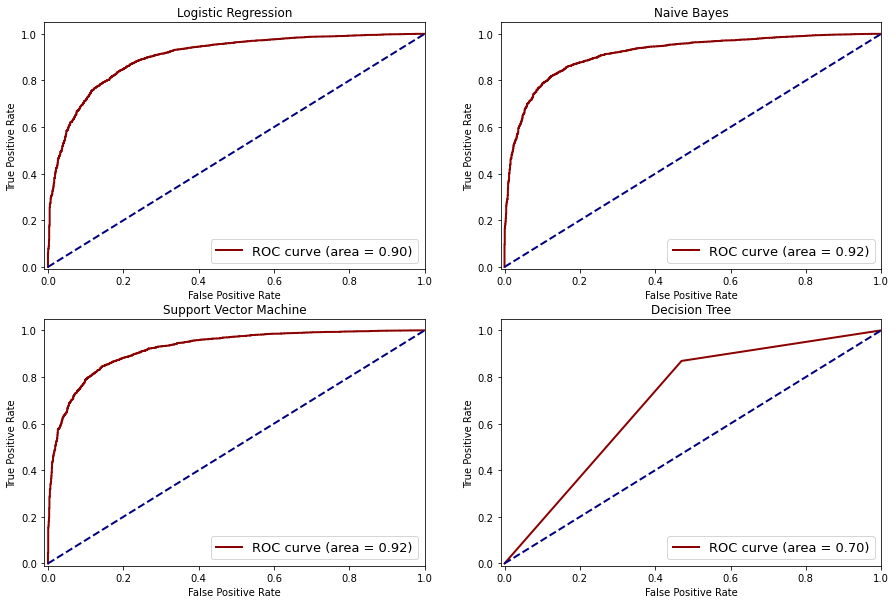

In [39]:
f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_dtc, tpr_dtc, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_dtc))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Decision Tree')
axes[1,1].legend(loc='lower right', fontsize=13);

In [43]:
# preparation for the confusion matrix

lr_cmatrix  =confusion_matrix(y_test.values, lr.predict(X_test))
nb_cmatrix  =confusion_matrix(y_test.values, nb.predict(X_test))
svm_cmatrix =confusion_matrix(y_test.values, svm.predict(X_test))
dtc_cmatrix  =confusion_matrix(y_test.values, dtc.predict(X_test))

print("Linear Regression confusion matrix")
print(lr_cmatrix)

print("Naive Bayes confusion matrix")
print(nb_cmatrix)

print("Decision tree confusion matrix")
print(dtc_cmatrix)

print("Support Vector machine confusion matrix")
print(svm_cmatrix)

Linear Regression confusion matrix
[[1039  525]
 [ 358 4867]]
Naive Bayes confusion matrix
[[1237  327]
 [ 620 4605]]
[[ 829  735]
 [ 685 4540]]
Support Vector machine confusion matrix
[[ 928  636]
 [ 207 5018]]


In [44]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n decision tree")
print(mt.classification_report(y_test, dtc.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1564
           1       0.90      0.93      0.92      5225

    accuracy                           0.87      6789
   macro avg       0.82      0.80      0.81      6789
weighted avg       0.87      0.87      0.87      6789


 Naive Bayes
              precision    recall  f1-score   support

           0       0.67      0.79      0.72      1564
           1       0.93      0.88      0.91      5225

    accuracy                           0.86      6789
   macro avg       0.80      0.84      0.81      6789
weighted avg       0.87      0.86      0.86      6789


 decision tree
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1564
           1       0.86      0.87      0.86      5225

    accuracy                           0.79      6789
   macro avg       0.70      0.70      0.70      6789
weighted avg       0.79 

In [ ]:
classifier = MultinomialNB(alpha=0.1)

In [47]:
#multinomial classifier with hyperparameter

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = mt.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\U6064365\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8597731624686994
Alpha: 0.1, Score : 0.8641920754161143
Alpha: 0.2, Score : 0.8628664015318899
Alpha: 0.30000000000000004, Score : 0.8624245102371483
Alpha: 0.4, Score : 0.862129916040654
Alpha: 0.5, Score : 0.8606569450581824
Alpha: 0.6000000000000001, Score : 0.8599204595669465
Alpha: 0.7000000000000001, Score : 0.8602150537634409
Alpha: 0.8, Score : 0.8602150537634409
Alpha: 0.9, Score : 0.8602150537634409


In [48]:
feature_names = cv.get_feature_names()

In [49]:
classifier.coef_[0]

array([ -7.48321284,  -9.88507008, -10.24988788, ...,  -8.16495828,
        -7.84062239, -10.02548726])

In [51]:
#good words
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:30]

[(-4.20845087932628, 'love'),
 (-4.217616433167807, 'dress'),
 (-4.2265621215957125, 'fit'),
 (-4.328781691830866, 'size'),
 (-4.554547649955245, 'wear'),
 (-4.593126694986164, 'look'),
 (-4.629600957858955, 'top'),
 (-4.696513969486684, 'color'),
 (-4.756257196663666, 'like'),
 (-4.766919387440655, 'great'),
 (-5.177114743173829, 'order'),
 (-5.199830313017301, 'perfect'),
 (-5.2095513179164765, 'small'),
 (-5.233858356268604, 'would'),
 (-5.243496379249555, 'fabric'),
 (-5.294016532819405, 'littl'),
 (-5.30694352035654, 'nice'),
 (-5.33653956139095, 'comfort'),
 (-5.3519072848968126, 'flatter'),
 (-5.39948039467972, 'soft'),
 (-5.400957936319683, 'one'),
 (-5.4153545312766465, 'beauti'),
 (-5.423891290963927, 'realli'),
 (-5.462972823728106, 'well'),
 (-5.513523937533065, 'bought'),
 (-5.518500722855054, 'tri'),
 (-5.576706436568056, 'bit'),
 (-5.587339178952424, 'jean'),
 (-5.587933214849659, 'cute'),
 (-5.62979810052691, 'usual')]

In [52]:
#most bad classified words
sorted(zip(classifier.coef_[0], feature_names))[:30]

[(-12.374353103396292, 'excit order'),
 (-12.374353103396292, 'look kind'),
 (-12.374353103396292, 'unwear'),
 (-11.95149625257626, 'back goe'),
 (-11.95149625257626, 'back went'),
 (-11.95149625257626, 'cute model'),
 (-11.95149625257626, 'fabric felt'),
 (-11.95149625257626, 'fit strang'),
 (-11.95149625257626, 'laugh'),
 (-11.95149625257626, 'small hole'),
 (-11.95149625257626, 'top unfortun'),
 (-11.95149625257626, 'way much fabric'),
 (-11.95149625257626, 'weirdli'),
 (-11.655230436433087, 'also felt'),
 (-11.655230436433087, 'boxi unflatt'),
 (-11.655230436433087, 'cheap look'),
 (-11.655230436433087, 'cheapli'),
 (-11.655230436433087, 'cute onlin'),
 (-11.655230436433087, 'cute pictur'),
 (-11.655230436433087, 'disappoint qualiti'),
 (-11.655230436433087, 'fabric stiff'),
 (-11.655230436433087, 'feel cheap'),
 (-11.655230436433087, 'odd fit'),
 (-11.655230436433087, 'poorli'),
 (-11.655230436433087, 'short wide'),
 (-11.655230436433087, 'top way'),
 (-11.655230436433087, 'unfort

In [53]:
df.to_csv('testouput.csv')